In [1]:
%run preamble.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# TwoSet Baseline
#
DS_NAME = "twoset"
DS_DATA = [ [ 10, 100 ] ]
DS_QUANTILES = np.linspace(0,1,11)

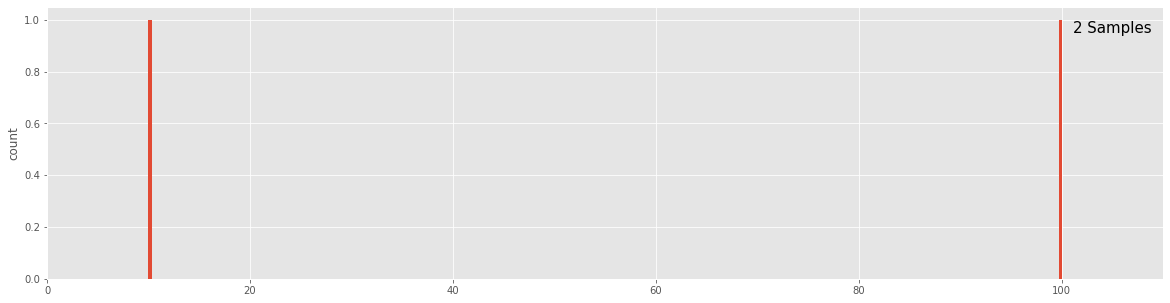

In [3]:
total = np.concatenate(DS_DATA)
ax = lin_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .
Merge ...
Quantiles ...
# tdigest
Insert .
Merge ...
Quantiles ...
# hdr
Insert .
Merge ...
Quantiles ...
# dd
Insert .
Merge ...
Quantiles ...
# circllhist
Insert .
Merge ...
Quantiles ...


In [5]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

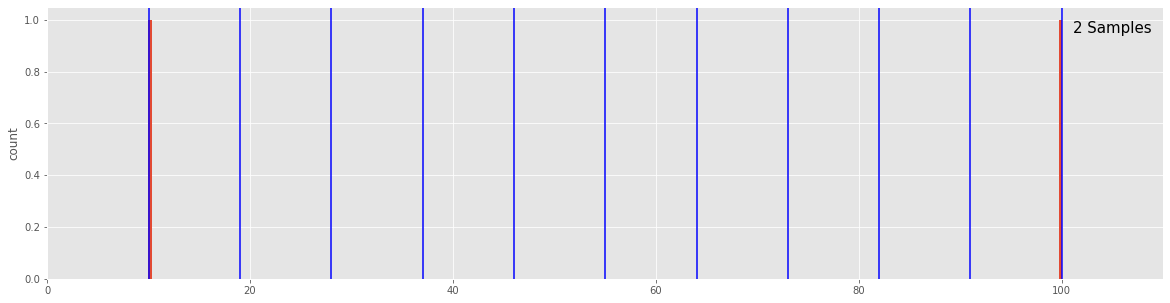

In [6]:
lin_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
# plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

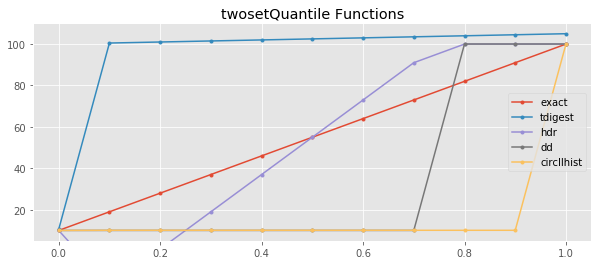

In [7]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.ylim(5, 110)
plt.savefig("images/" + DS_NAME + "_quantile_comparison")

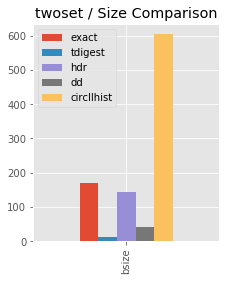

In [8]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.title(DS_NAME + " / Size Comparison")
plt.savefig("images/" + DS_NAME + "_size")

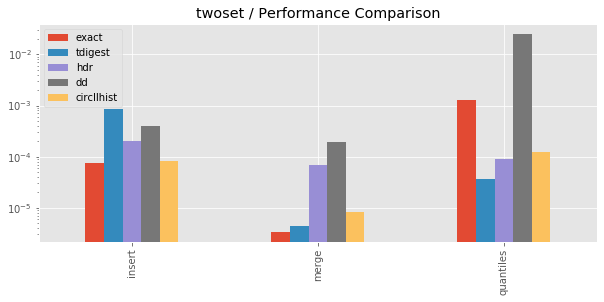

In [9]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Performance Comparison")
plt.savefig("images/" + DS_NAME + "_perf")

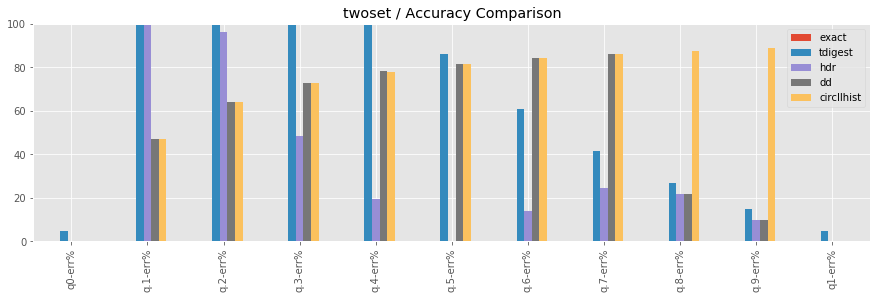

In [10]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("linear")
plt.ylim(0, 100)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")